In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smplotlib
from astropy.constants import h, c, k_B

In [2]:
c_cgs = c.cgs.value
h_cgs = h.cgs.value
k_B_cgs = k_B.cgs.value

nu = np.logspace(9, 15, 10000)

T_d = 20
beta = 1.7  # Dust emissivity index

B_nu = (2 * h_cgs * nu**3 / c_cgs**2) / (np.exp(h_cgs * nu / (k_B_cgs * T_d)) - 1)

S_dust = B_nu * nu**beta

T_e = 1e8  # Electron temperature [K]
n_e = 1e5  # Electron density [cm^-3]

S_ff = (T_e**0.5 * n_e**2) * nu**-2

recombination_lines = {
    r'H$\alpha$ 6563A': 4.57e14,  # Hz (656.3 nm)
    r'H$\beta$ 4861A': 6.16e14,  # Hz (486.1 nm)
    r'Pa-$\alpha$ 1875A': 1.87e14,  # Hz (1.875 µm)
}

S_recomb = np.zeros_like(nu)
for name, nu_line in recombination_lines.items():
    S_recomb += np.exp(-0.5 * ((nu - nu_line) / (0.1 * nu_line))**2)

S_total = S_dust + S_ff + S_recomb

In this model, we construct the total spectral energy distribution (SED) of a source by combining three emission components: thermal dust emission, free-free emission, and hydrogen recombination line emission.

The thermal dust emission is modelled as a modified blackbody, assuming a dust temperature of $T_d = 20~K$, and a dust emissivity index $\beta = 1.7$, typical for interstellar dust. The Planck function $B_\nu(T_d)$ is calculated at each frequency following:

$$
B_\nu(T) = \frac{2h\nu^3}{c^2} \left( \exp\left(\frac{h\nu}{k_BT}\right) - 1 \right)^{-1}.
$$

The flux density of the dust component is then scaled by a power law $\nu^\beta$, giving

$$
S_\mathrm{dust}(\nu) = B_\nu(T_d) \times \nu^\beta.
$$

The free-free (thermal bremsstrahlung) emission is calculated for an ionised plasma with an electron temperature $T_e = 10^8~K$ and an electron number density $n_e = 10^5\ \mathrm{cm^{-3}}$. The free-free flux density scales approximately as

$$
S_\mathrm{ff}(\nu) \propto T_e^{1/2} n_e^2 \nu^{-2},
$$

capturing the flat radio slope and rapid decline towards higher frequencies.

Additionally, we model hydrogen recombination line emission by including Gaussian peaks centred at three specific transitions: $H\alpha$ at 6563$\AA$ ($\nu = 4.57 \times 10^{14}\ \mathrm{Hz}$), $H\beta$ at 4861$\AA$ ($\nu = 6.16 \times 10^{14}\ \mathrm{Hz}$), and $Pa-\alpha$ at 1.875 $\mu$m ($\nu = 1.87 \times 10^{14}\ \mathrm{Hz}$). Each line is represented as a Gaussian with a width of $10\%$ of the central frequency.

The total SED (as shown below) is obtained by summing the three contributions:

$$
S_\mathrm{total} = S_\mathrm{dust} + S_\mathrm{ff} + S_\mathrm{recomb}.
$$

Notice that the frequency range is logarithmically sampled just from $10^9\ \mathrm{Hz}$ to $10^{15}\ \mathrm{Hz}$, to ensure coverage across radio, submillimetre, infrared, optical, and ultraviolet wavelengths.

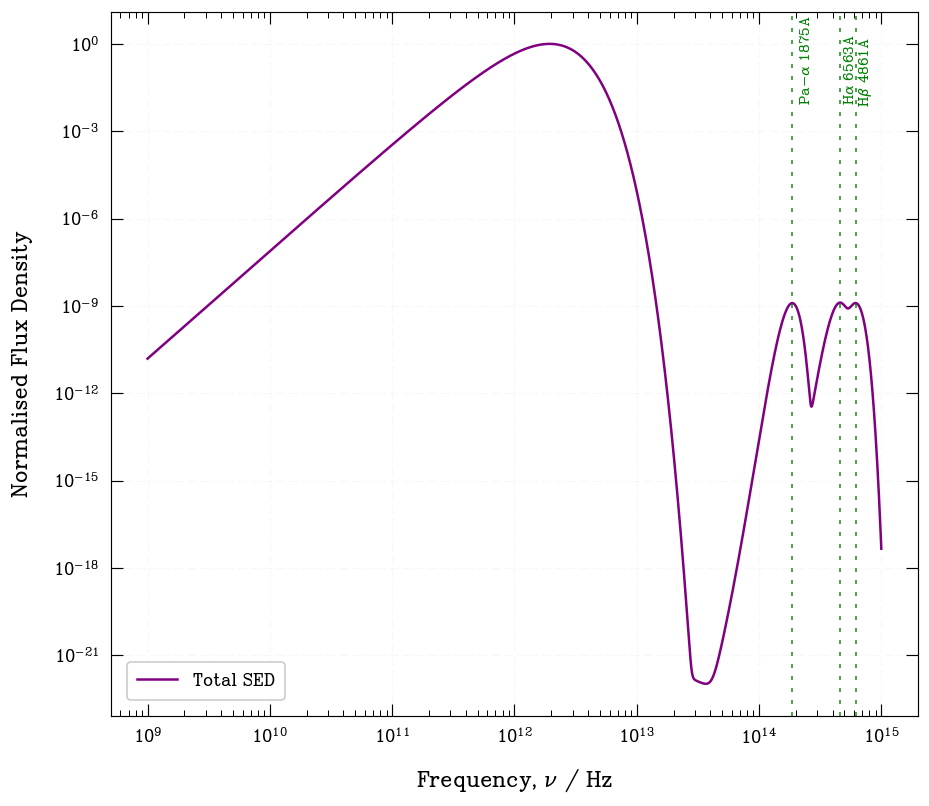

In [3]:
fig, ax = plt.subplots(figsize = (8, 7))

S_total_norm = S_total / np.max(S_total)
S_dust_norm = S_dust / np.max(S_total)  # Normalize with respect to max(S_total)
S_ff_norm = S_ff / np.max(S_total)  # Normalize with respect to max(S_total)

ax.grid(alpha = 0.05)
ax.set(xscale = 'log', yscale = 'log')
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.set_xlabel(r'Frequency, $\nu$ / Hz', fontsize = 15, labelpad = 12)
ax.set_ylabel(r'Normalised Flux Density', fontsize = 15, labelpad = 12)

ax.plot(nu, S_total_norm, label = 'Total SED', color = 'purple', lw = 1.5)
#ax.plot(nu, S_dust_norm, label = 'Dust Emission (A)', color = 'red', lw = 1.5)
#ax.plot(nu, S_ff_norm, label = 'Free-Free Emission (B)', color = 'navy', lw = 1.5)

for name, nu_line in recombination_lines.items():
    plt.axvline(nu_line, color='green', linestyle='dotted', alpha = 0.7)
    plt.text(nu_line + 2e13, max(S_total_norm)*0.01, name, rotation = 90, fontsize = 10, color = "green")

ax.legend(loc = 'lower left', fontsize = 12, frameon = True)
plt.tight_layout()
plt.savefig('Q07_SED.pdf')